In [1]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import string
import nltk
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plf
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [2]:
pwd

'C:\\Users\\rakib\\Downloads\\editproject random forest'

In [3]:
df = pd.read_csv('Spam.csv', encoding='ISO-8859-1')
le = LabelEncoder()

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(df.columns[[ 2,3,4]], axis=1)
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [9]:
data = df.to_numpy()

In [10]:
X = data[:, 1]
y = data[:, 0]

In [11]:
X.shape, y.shape

((5169,), (5169,))

In [12]:
df["Character_length"]=df["v2"].apply(len)

In [13]:
df['num_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_sentences'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.head(5)

,v1,v2,Character_length,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


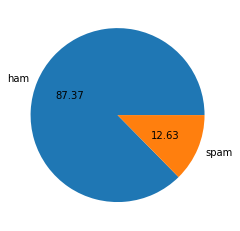

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

<AxesSubplot:xlabel='Character_length', ylabel='Count'>

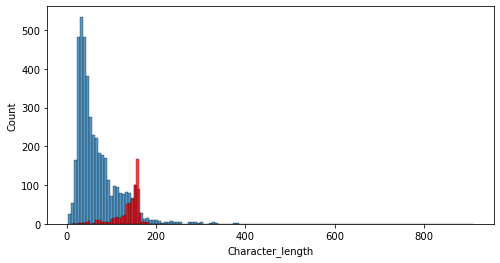

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['v1'] == 'ham']['Character_length'])
sns.histplot(df[df['v1'] == 'spam']['Character_length'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

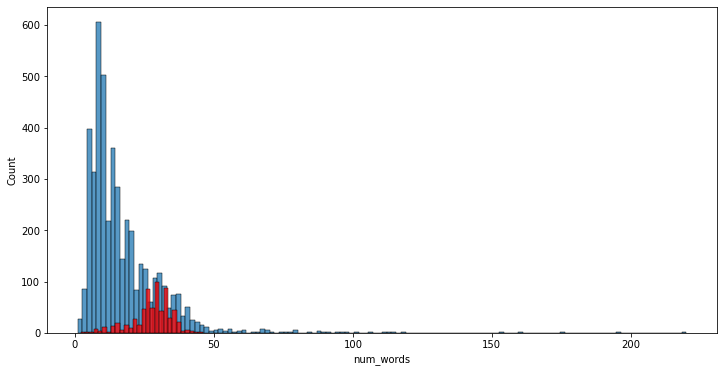

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1'] == 'ham']['num_words'])
sns.histplot(df[df['v1'] == 'spam']['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

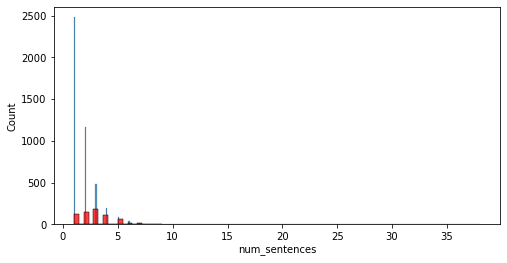

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['v1'] == 'ham']['num_sentences'])
sns.histplot(df[df['v1'] == 'spam']['num_sentences'],color='red')

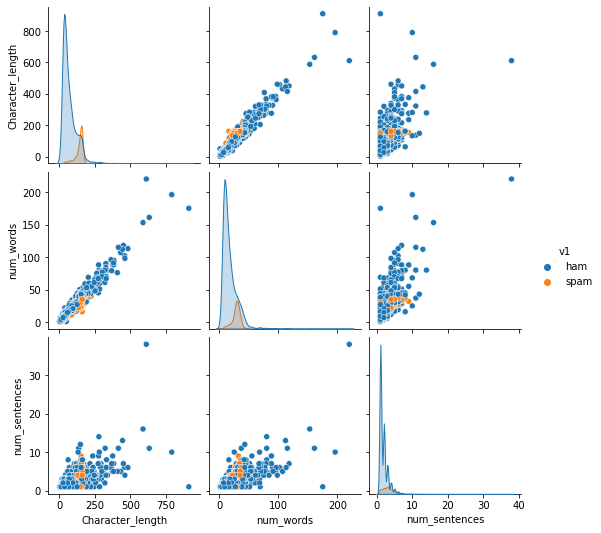

In [21]:
sns.pairplot(df,hue='v1')

<AxesSubplot:>

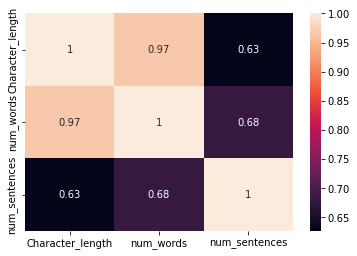

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
df['v1'].replace(['spam', 'ham'],
                        [1,0], inplace=True)

In [24]:
df.head()

,v1,v2,Character_length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
tokenizer = RegexpTokenizer('\w+')
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def getStem(review):
    review = review.lower()
    tokens = tokenizer.tokenize(review) # breaking into small words
    
    return tokens

In [28]:
# get a clean document
def getDoc(document):
    d = []
    for doc in document:
        d.append(getStem(doc))
    return d

In [29]:
tokenized = getDoc(X)

In [30]:
tokenized [:20]

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  't',
  'c',
  's',
  'apply',
  '08452810075over18',
  's'],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  'don',
  't',
  'think',
  'he',
  'goes',
  'to',
  'usf',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  's',
  'been',
  '3',
  'week',
  's',
  'now',
  'and',
  'no',
  'word',
  'back',
  'i',
  'd',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',


In [31]:
def getStem(review):
    review = review.lower()
    tokens = tokenizer.tokenize(review) # breaking into small words
    
    
    removed_stopwords = [w for w in tokens if w not in sw]
    
    return removed_stopwords

In [32]:
def getDoc(document):
    d = []
    for doc in document:
        d.append(getStem(doc))
    return d

In [33]:
stop_removed = getDoc(X)

In [34]:
stop_removed [:20]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply',
  '08452810075over18'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'å',
  '1',
  '50',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  

In [35]:
def getStem(review):
    review = review.lower()
    tokens = tokenizer.tokenize(review) # breaking into small words
    removed_stopwords = [w for w in tokens if w not in sw]
    stemmed_words = [ps.stem(token) for token in removed_stopwords]
    clean_review = ' '.join(stemmed_words)
    return clean_review

In [36]:
def getDoc(document):
    d = []
    for doc in document:
        d.append(getStem(doc))
    return d

In [37]:
stemmed_doc = getDoc(X)

In [38]:
stemmed_doc[:20]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send å 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea å 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free

In [39]:
cv = CountVectorizer()

In [40]:
# create my vocab
vc = cv.fit_transform(stemmed_doc)

In [41]:
cv.get_feature_names()

['00',
 '000',
 '000pe',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '0845

In [42]:
counts = pd.DataFrame(vc.toarray(),
                      columns=cv.get_feature_names())
counts

,00,000,000pe,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thank,ûªm,ûªt,ûªve,ûï,ûïharri,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x = counts.iloc[:5169,1]
y1=counts.iloc[:5169,:7213]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
...     y1, x, test_size=0.33, random_state=42)

In [45]:
X_train.shape,X_test.shape

((3463, 7213), (1706, 7213))

In [46]:
modelrf = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
modelrf.fit(X_train, y_train)
modelrf.score(X_test, y_test)

0.9953106682297772

In [47]:
importances=modelrf.feature_importances_

In [48]:
final_df=pd.DataFrame({"Features": X_train.columns, "Importances":importances})

In [49]:
final_df= final_df.sort_values('Importances')

<AxesSubplot:xlabel='Features', ylabel='Importances'>

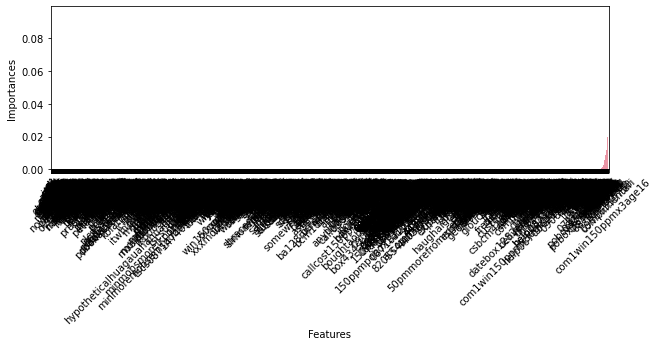

In [50]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features", y= "Importances", data= final_df)

In [51]:
model_tree = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
sel_rfe_tree = RFE(estimator=model_tree,n_features_to_select=18,step=1)

In [52]:
X_train_rfe_tree=sel_rfe_tree.fit_transform(X_train,y_train)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[False  True False ... False False False]
[7195    1  174 ... 7146 7148 7179]


In [53]:
y_pred_rf= sel_rfe_tree.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf)

0.9994138335287222

In [54]:
selected_cols= [column for column in X_train.columns if column in X_train.columns[sel_rfe_tree.get_support()]]
selected_cols

['000',
 '02',
 '03',
 '10',
 '10p',
 '150ppm',
 '8wp',
 'attempt',
 'box95qu',
 'box97n7qp',
 'caller',
 'cash',
 'complimentari',
 'congratul',
 'holiday',
 'ibiza',
 'prize',
 'urgent']

In [55]:
x = df["v1"]
y1= counts[selected_cols]

In [56]:
y1

,000,02,03,10,10p,150ppm,8wp,attempt,box95qu,box97n7qp,caller,cash,complimentari,congratul,holiday,ibiza,prize,urgent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:

X_train, X_test, y_train, y_test = train_test_split(
...     y1, x, test_size=0.33, random_state=42)

In [58]:
X_train.shape,X_test.shape

((3463, 18), (1706, 18))

# Random Forest

In [59]:
%%time
modelrf = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
modelrf.fit(X_train, y_train)
modelrf.score(X_train, y_train)

Wall time: 715 ms


0.9023967658099913

In [60]:
modelrf.score(X_test, y_test)

0.8921453692848769

In [61]:
yt_pred=modelrf.predict(X_test)

In [62]:
confusion_matrix(y_test,yt_pred)

array([[1467,    5],
       [ 179,   55]], dtype=int64)

In [63]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1472
           1       0.92      0.24      0.37       234

    accuracy                           0.89      1706
   macro avg       0.90      0.62      0.66      1706
weighted avg       0.89      0.89      0.86      1706



# Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
%%time
modelnb = MultinomialNB()
modelnb.fit(X_train, y_train)
modelnb.score(X_train, y_train)


Wall time: 5 ms


0.8911348541726827

In [66]:
modelnb.score(X_test, y_test)

0.8815943728018757

In [67]:
yt_pred=modelnb.predict(X_test)

In [68]:
confusion_matrix(y_test,yt_pred)

array([[1472,    0],
       [ 202,   32]], dtype=int64)

In [69]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1472
           1       1.00      0.14      0.24       234

    accuracy                           0.88      1706
   macro avg       0.94      0.57      0.59      1706
weighted avg       0.90      0.88      0.84      1706



# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
%%time
modeldt = DecisionTreeClassifier(random_state=100)
modeldt.fit(X_train, y_train)
modeldt.score(X_train, y_train)

Wall time: 10 ms


0.9058619693907017

In [72]:
modeldt.score(X_test, y_test)

0.888042203985932

In [73]:
yt_pred=modeldt.predict(X_test)

In [74]:
confusion_matrix(y_test,yt_pred)

array([[1456,   16],
       [ 175,   59]], dtype=int64)

In [75]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1472
           1       0.79      0.25      0.38       234

    accuracy                           0.89      1706
   macro avg       0.84      0.62      0.66      1706
weighted avg       0.88      0.89      0.86      1706



# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
%%time
modellg = LogisticRegression()
modellg.fit(X_train, y_train)
modellg.score(X_train, y_train)

Wall time: 40 ms


0.9015304649148137

In [78]:
modellg.score(X_test, y_test)

0.8927315357561547

In [79]:
yt_pred=modellg.predict(X_test)

In [80]:
confusion_matrix(y_test,yt_pred)

array([[1467,    5],
       [ 178,   56]], dtype=int64)

In [81]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1472
           1       0.92      0.24      0.38       234

    accuracy                           0.89      1706
   macro avg       0.90      0.62      0.66      1706
weighted avg       0.90      0.89      0.86      1706



# AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
%%time
modelada=AdaBoostClassifier()
modelada.fit(X_train, y_train)
modelada.score(X_train, y_train)

Wall time: 245 ms


0.9049956684955242

In [84]:
modelada.score(X_test, y_test)

0.8933177022274326

In [85]:
yt_pred=modelada.predict(X_test)

In [86]:
confusion_matrix(y_test,yt_pred)

array([[1462,   10],
       [ 172,   62]], dtype=int64)

In [87]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1472
           1       0.86      0.26      0.41       234

    accuracy                           0.89      1706
   macro avg       0.88      0.63      0.67      1706
weighted avg       0.89      0.89      0.87      1706



# Hard Voting

In [88]:
vote = VotingClassifier(
    estimators = [("rf",modelrf),("log", modellg), ("Dt", modeldt), ("nG", modelnb),("ada",modelada)],
    voting='hard',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
)

In [89]:
%%time
for clf in (modelrf, modellg, modeldt, modelnb,modelada, vote):
    clf.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred) )

Wall time: 5.79 s


In [90]:
yt_pred=clf.predict(X_test)

In [91]:
confusion_matrix(y_test,yt_pred)

array([[1467,    5],
       [ 179,   55]], dtype=int64)

In [92]:
accuracy_score(y_test,yt_pred)

0.8921453692848769

In [93]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1472
           1       0.92      0.24      0.37       234

    accuracy                           0.89      1706
   macro avg       0.90      0.62      0.66      1706
weighted avg       0.89      0.89      0.86      1706



# Soft Voting

In [94]:
vote = VotingClassifier(
    estimators = [("rf",modelrf),("log", modellg), ("Dt", modeldt), ("nG", modelnb),("ada",modelada)],
    voting='soft',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
)

In [95]:
%%time
for clf in (modelrf, modellg, modeldt, modelnb, modelada, vote):
    clf.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred) )

Wall time: 1.45 s


In [96]:
yt_pred=clf.predict(X_test)

In [97]:
confusion_matrix(y_test,yt_pred)

array([[1466,    6],
       [ 175,   59]], dtype=int64)

In [98]:

accuracy_score(y_test,yt_pred)

0.8939038686987104

In [99]:
print(classification_report(y_test,yt_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1472
           1       0.91      0.25      0.39       234

    accuracy                           0.89      1706
   macro avg       0.90      0.62      0.67      1706
weighted avg       0.90      0.89      0.87      1706

